# Buatlah intrumen kuesioner, dan lakukan uji Validitas dan Reliabilitas, dilanjutkan analisis faktor

### Mengaktifkan library yang digunakan dan Membuka dataframe yang berisi kuesioner

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel('data_answer.xlsx')
data1 = data.drop(columns = (['Nama Lengkap', 'NRP']))
data1

,Timestamp,Program Studi,Kemudahan Aksesbilitas Kampus PENS [Seberapa strategis lokasi PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa mudah aksesibilitas transportasi menuju PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa memadai fasilitas parkir di PENS?],Kemudahan Aksesbilitas Kampus PENS [Sejauh mana fasilitas penyandang disabilitas?],Kemudahan Aksesbilitas Kampus PENS [Bagaimana kualitas WIFI di area kampus PENS],Fasilitas Sarana dan Prasana Kampus PENS [Laboratorium],Fasilitas Sarana dan Prasana Kampus PENS [Perpustakaan],Fasilitas Sarana dan Prasana Kampus PENS [Masjid],...,Tenaga Pendidik Kampus PENS [Kemampuan dosen dalam menjawab pertanyaan],Tenaga Pendidik Kampus PENS [Ketepatan waktu kuliah],"Tenaga Pendidik Kampus PENS [Penguasaan dosen terhadap materi, wawasan, dan implementasi mata kuliah yang diampu]",Minat dan Bakat Kampus PENS [Organisasi mahasiswa (Ormawa)],Minat dan Bakat Kampus PENS [Unit Kreatifitas Mahasiswa (UKM)],Minat dan Bakat Kampus PENS [Komunitas],Minat dan Bakat Kampus PENS [Prestasi Akademik/non-Akademik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Bahan ajar (handout/file ppt)],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Buku referensi (textbook) tersedia dengan baik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan sarana prasarana dan kualitasnya yang mendukung mata kuliah]
0,2023-10-24 09:43:04.426,D4 Sains Data Terapan,Baik,Baik,Kurang,Kurang,Kurang,Baik,Kurang,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Kurang,Baik
1,2023-10-24 09:43:09.541,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
2,2023-10-24 09:43:34.792,D4 Sains Data Terapan,Baik,Baik,Kurang,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Baik,...,Baik,Baik,Baik,Kurang,Kurang,Baik,Baik,Kurang,Kurang,Kurang
3,2023-10-24 09:43:36.658,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik
4,2023-10-24 09:43:45.975,D4 Sains Data Terapan,Sangat Baik,Sangat Baik,Kurang,Kurang,Kurang,Sangat Baik,Sangat Baik,Baik,...,Sangat Baik,Baik,Sangat Baik,Kurang,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023-10-25 19:14:01.400,D4 Teknik Informatika,Sangat Baik,Baik,Baik,Baik,Sangat Kurang,Sangat Baik,Sangat Baik,Kurang,...,Baik,Kurang,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
119,2023-10-25 19:18:07.145,D3 Teknik Informatika,Baik,Baik,Kurang,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Sangat Baik,Baik,Sangat Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
120,2023-10-25 19:49:06.825,D4 Teknik Informatika,Baik,Baik,Baik,Baik,Sangat Kurang,Baik,Sangat Baik,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
121,2023-10-25 22:00:23.219,D3 Teknik Informatika,Baik,Baik,Kurang,Kurang,Kurang,Baik,Baik,Baik,...,Baik,Baik,Sangat Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Baik,Kurang


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 25 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                 --------------  -----         
 0   Timestamp                                                                                                              123 non-null    datetime64[ns]
 1   Nama Lengkap                                                                                                           123 non-null    object        
 2   NRP                                                                                                                    123 non-null    int64         
 3   Program Studi                                                                                                      

### PRE PROCESSING

In [4]:
data1 = data.drop(columns = (['Timestamp', 'Program Studi','Nama Lengkap', 'NRP']))
df = pd.DataFrame(data1)

# Menggantikan nilai 'sangat baik' dengan 4 dan 'baik' dengan 3 di seluruh dataframe
df = df.replace({'Sangat Baik': 4, 'Baik': 3, 'Kurang' : 2, 'Sangat Kurang' : 1 })

# Rename kolom dari indeks 0 hingga 21
columns_to_rename = df.columns[0:5] 
new_column_names = [f'A{i + 1}' for i in range(len(columns_to_rename))]
df.columns.values[0:5] = new_column_names

columns_to_rename = df.columns[5:10] 
new_column_names = [f'B{i + 1}' for i in range(len(columns_to_rename))]
df.columns.values[5:10] = new_column_names

columns_to_rename = df.columns[10:14] 
new_column_names = [f'C{i + 1}' for i in range(len(columns_to_rename))]
df.columns.values[10:14] = new_column_names

columns_to_rename = df.columns[14:18] 
new_column_names = [f'D{i + 1}' for i in range(len(columns_to_rename))]
df.columns.values[14:18] = new_column_names

columns_to_rename = df.columns[18:21] 
new_column_names = [f'E{i + 1}' for i in range(len(columns_to_rename))]
df.columns.values[18:21] = new_column_names

df

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,C2,C3,C4,D1,D2,D3,D4,E1,E2,E3
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,3,2,3
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3
2,3,3,2,3,4,4,4,3,2,2,...,3,3,3,2,2,3,3,2,2,2
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,3,4,4
4,4,4,2,2,2,4,4,3,4,2,...,4,3,4,2,3,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4,3,3,3,1,4,4,2,3,3,...,3,2,3,3,3,3,3,3,3,3
119,3,3,2,3,3,4,4,4,4,4,...,4,3,4,3,3,3,3,3,3,3
120,3,3,3,3,1,3,4,2,3,3,...,3,3,3,3,3,3,3,3,3,3
121,3,3,2,2,2,3,3,3,3,3,...,3,3,4,3,3,3,4,4,3,2


# UJI VALIDITAS, 30 data awal

In [5]:
# Fungsi untuk menjumlahkan kolom-kolom dan membuat tabel baru
def jumlahkan_dan_buat_tabel(data, kolom_awal, kolom_akhir, nama_kolom):
    hasil_jumlah = data.iloc[:, kolom_awal:kolom_akhir+1].sum(axis=1)
    tabel_hasil = pd.concat([data.iloc[:, :kolom_akhir+1], hasil_jumlah, data.iloc[:, kolom_akhir+1:]], axis=1)
    tabel_hasil.columns = list(data.columns[:kolom_akhir+1]) + [nama_kolom] + list(data.columns[kolom_akhir+1:])
    return tabel_hasil

# Operasi penjumlahan kolom "SUM P1"
operasi_1 = jumlahkan_dan_buat_tabel(df, 0, 4, 'SUM P1')

# Operasi penjumlahan kolom "SUM P2"
operasi_2 = jumlahkan_dan_buat_tabel(operasi_1, 6, 10, 'SUM P2')

# OOperasi penjumlahan kolom "SUM P3"
operasi_3 = jumlahkan_dan_buat_tabel(operasi_2, 12, 15, 'SUM P3')

# Operasi penjumlahan kolom "SUM P4"
operasi_4 = jumlahkan_dan_buat_tabel(operasi_3, 17, 20, 'SUM P4')

# Operasi penjumlahan kolom "SUM P5"
operasi_5 = jumlahkan_dan_buat_tabel(operasi_4, 22, 24, 'SUM P5')

dataa = operasi_5
dataa

,A1,A2,A3,A4,A5,SUM P1,B1,B2,B3,B4,...,SUM P3,D1,D2,D3,D4,SUM P4,E1,E2,E3,SUM P5
0,3,3,2,2,2,12,3,2,2,2,...,12,3,3,3,3,12,3,2,3,8
1,3,3,3,3,4,16,4,4,4,4,...,12,3,3,3,3,12,3,3,3,9
2,3,3,2,3,4,15,4,4,3,2,...,12,2,2,3,3,10,2,2,2,6
3,3,3,3,3,4,16,4,4,4,4,...,12,3,3,3,3,12,3,4,4,11
4,4,4,2,2,2,14,4,4,3,4,...,14,2,3,3,3,11,4,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4,3,3,3,1,14,4,4,2,3,...,11,3,3,3,3,12,3,3,3,9
119,3,3,2,3,3,14,4,4,4,4,...,15,3,3,3,3,12,3,3,3,9
120,3,3,3,3,1,13,3,4,2,3,...,12,3,3,3,3,12,3,3,3,9
121,3,3,2,2,2,12,3,3,3,3,...,12,3,3,3,4,13,4,3,2,9


C:\Users\User\AppData\Local\Temp\ipykernel_1376\1813950815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


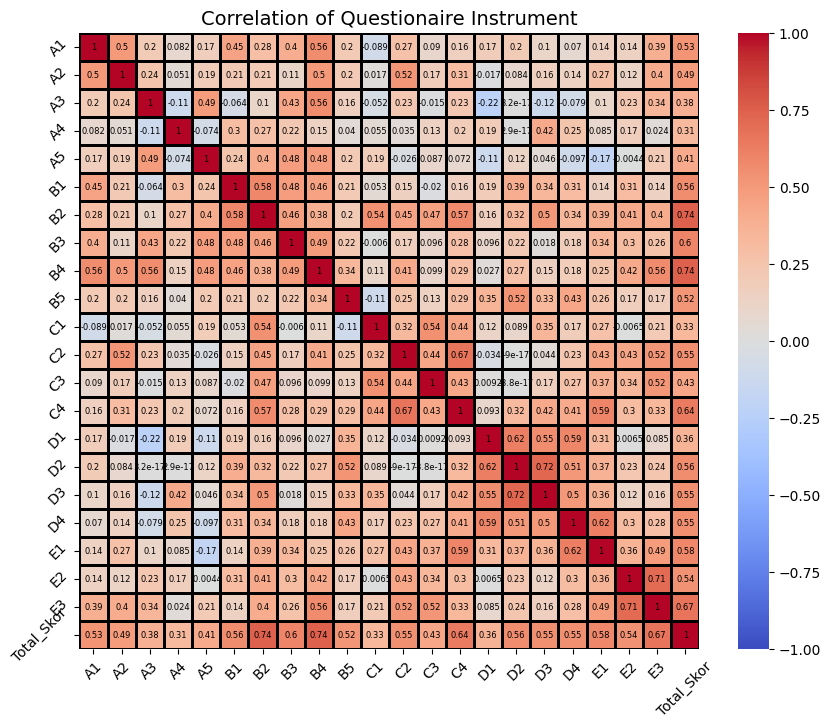

In [6]:
dfr = df.loc[0:29]
dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)

corr_matrix = dfr.corr()
# Membuat heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':6,'color':'black'})
# Menyesuaikan ukuran label dan merotasi mereka
plt.tick_params(labelsize=10, rotation=45)

# Menambahkan judul
plt.title('Correlation of Questionaire Instrument', size=14)

# Menyimpan gambar
plt.savefig("corr_quest1.png")

In [7]:
print(dfr.corr(method = 'pearson'))

                  A1        A2            A3            A4        A5  \
A1          1.000000  0.498655  1.968443e-01  8.199201e-02  0.166906   
A2          0.498655  1.000000  2.430507e-01  5.121475e-02  0.189554   
A3          0.196844  0.243051  1.000000e+00 -1.116639e-01  0.491811   
A4          0.081992  0.051215 -1.116639e-01  1.000000e+00 -0.074023   
A5          0.166906  0.189554  4.918111e-01 -7.402332e-02  1.000000   
B1          0.450146  0.211844 -6.382418e-02  3.008284e-01  0.244952   
B2          0.283020  0.205194  1.018665e-01  2.712125e-01  0.401521   
B3          0.395515  0.112296  4.309172e-01  2.192645e-01  0.482863   
B4          0.560112  0.499805  5.557614e-01  1.463850e-01  0.478586   
B5          0.204980  0.204859  1.563295e-01  4.000000e-02  0.203564   
C1         -0.089427  0.017456 -5.176075e-02  5.453419e-02  0.186702   
C2          0.267310  0.518961  2.322025e-01  3.524537e-02 -0.026090   
C3          0.089828  0.172645 -1.505676e-02  1.348400e-01  0.08

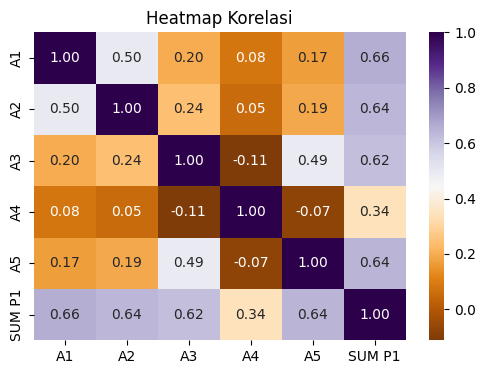

In [8]:
df1 = dataa.loc[0:29,"A1":"SUM P1"]
corr_matrix = df1.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

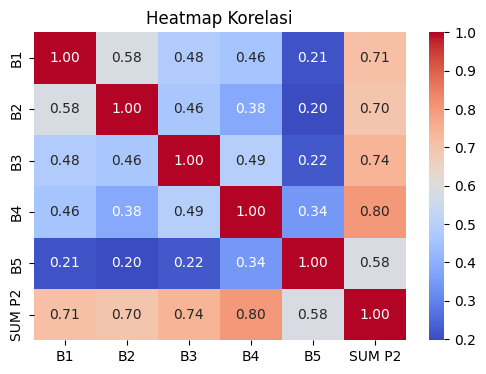

In [9]:
df2 = dataa.loc[0:29,"B1":"SUM P2"]
corr_matrix = df2.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

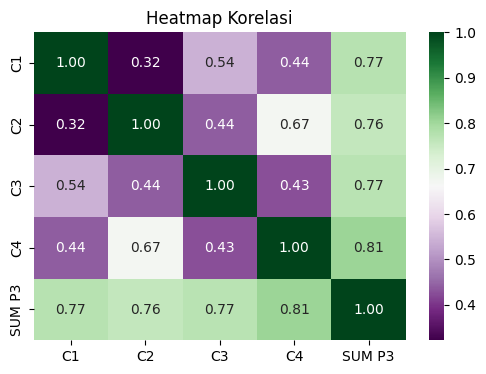

In [10]:
df3 = dataa.loc[0:29,"C1":"SUM P3"]
corr_matrix = df3.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PRGn', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

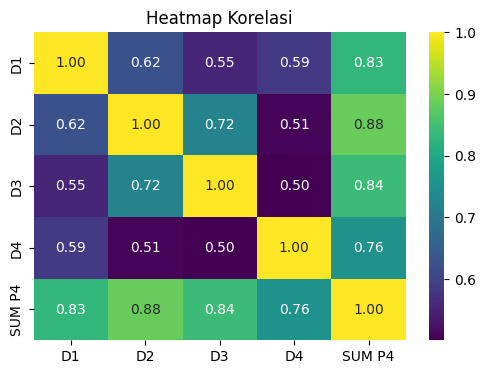

In [11]:
df4 = dataa.loc[0:29,"D1":"SUM P4"]
corr_matrix = df4.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

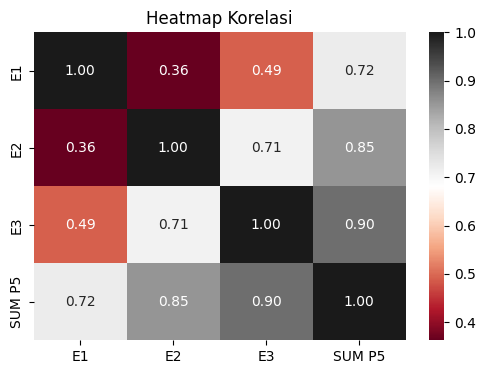

In [12]:
df5 = dataa.loc[0:29,"E1":"SUM P5"]
corr_matrix = df5.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1376\2800746823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['Total_Skor'] = dfq.sum(axis = 1, skipna = True)


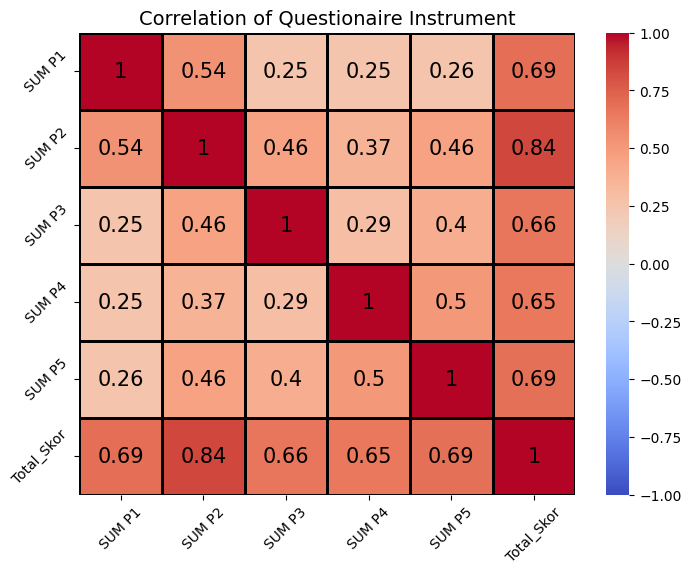

In [13]:
# Memilih kolom-kolom dengan 'SUM P1' hingga 'SUM P5'
dfq = dataa[['SUM P1', 'SUM P2', 'SUM P3', 'SUM P4', 'SUM P5']]

dfq['Total_Skor'] = dfq.sum(axis = 1, skipna = True)
dfq
corr_matrix = dfq.corr()
# Membuat heatmap
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':15,'color':'black'})
# Menyesuaikan ukuran label dan merotasi mereka
plt.tick_params(labelsize=10, rotation=45)

# Menambahkan judul
plt.title('Correlation of Questionaire Instrument', size=14)

# Menyimpan gambar
plt.savefig("corr_quest.png")

## Karena Mayoritas Indikator nilai R Hitung > R Tabel maka Data ini Valid

# UJI RELIABILITAS

In [14]:
dfr = df.loc[0:29]
dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)
dfr.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1376\3471237405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,C3,C4,D1,D2,D3,D4,E1,E2,E3,Total_Skor
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,2,3,56
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,69
2,3,3,2,3,4,4,4,3,2,2,...,3,3,2,2,3,3,2,2,2,58
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,4,4,69
4,4,4,2,2,2,4,4,3,4,2,...,3,4,2,3,3,3,4,4,4,68


In [15]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(df_corr.columns):
        sum = df_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [16]:
cronbach_alpha(df)

0.8597796579903998

## Karena Nilai Cronach's Alpha > 0.70 Maka dapat disimpulkan Data ini Reliabel

# ANALISIS FAKTOR 

## a.) UJI KECUKUPAN

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(856.4217940511593, 6.766763400139179e-79)

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7749047209515441

In [19]:
import pingouin as pg
pg.cronbach_alpha(data=dfr)

(0.7389900564247036, array([0.582, 0.857]))

In [20]:
pg.cronbach_alpha(data=df, ci=.99)

(0.8499026910945573, array([0.794, 0.896]))

## b.) Analisis faktor 

In [21]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.74144857, 2.00698805, 1.71878509, 1.19616659, 1.12375242,
       1.06312233, 1.00192814, 0.95524295, 0.79144365, 0.76597461,
       0.66119661, 0.62060834, 0.56835086, 0.49182265, 0.46120113,
       0.43353821, 0.3901012 , 0.30867309, 0.26730492, 0.25046449,
       0.1818861 ])

## c.) Scree Plot

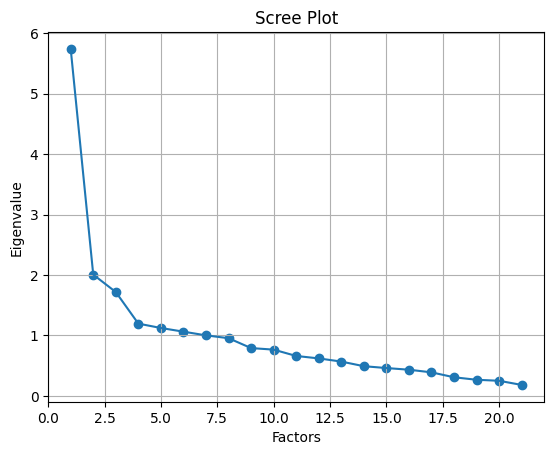

In [22]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## d.) Ambil faktor yang mempunyai nilai eigen > 1

In [23]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [24]:
loadings = fa.loadings_

In [25]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

           0         1         2         3         4         5
A1  0.117496  0.140607 -0.010992 -0.064291  0.493791  0.129974
A2  0.116322  0.126096  0.036073  0.124671  0.683801 -0.001504
A3 -0.122885  0.261563  0.012245  0.086726  0.434178  0.060544
A4  0.150431  0.265351  0.108277  0.027020  0.094347 -0.072817
A5  0.011869  0.276709  0.082156  0.062988  0.157771  0.411630
B1  0.250675  0.574094  0.088222  0.170204  0.155879  0.232459
B2  0.277700  0.713061  0.148885  0.095063  0.108172  0.124865
B3  0.143100  0.525037  0.062672  0.091989  0.253599  0.142906
B4  0.188558  0.408631  0.031433  0.220554  0.262671 -0.060419
B5  0.084975  0.382167  0.156178  0.117195  0.100679  0.241269
C1  0.658835  0.245598 -0.046696  0.034554 -0.045954  0.229583
C2  0.835806  0.193863  0.012336  0.154577  0.150362 -0.074852
C3  0.497342  0.149367  0.127959  0.150242  0.136869  0.117695
C4  0.619990  0.150042  0.176997  0.137291 -0.000510  0.005708
D1  0.212389  0.052673  0.501265  0.173566  0.053573  0

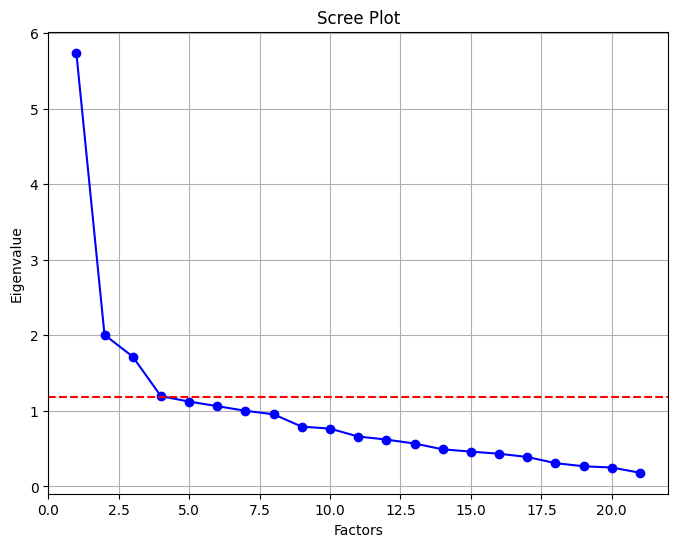

In [26]:
# Assuming these are your eigenvalues
eigenvalues = [5.74144857, 2.00698805, 1.71878509, 1.19616659, 1.12375242,1.06312233, 1.00192814, 0.95524295, 0.79144365, 0.76597461,
       0.66119661, 0.62060834, 0.56835086, 0.49182265, 0.46120113,0.43353821, 0.3901012 , 0.30867309, 0.26730492, 0.25046449,
       0.1818861]

# Create a range for your factors, which is from 1 to the number of eigenvalues
factors = np.arange(1, len(eigenvalues) + 1)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(factors, eigenvalues, 'bo-')  # blue circle markers connected by a line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)  # This adds a grid to the plot

# Draw a horizontal line at eigenvalue = 1.1 with red color
plt.axhline(y=1.19, color='red', linestyle='--')

# Optionally, if you want to set the facecolor of the axes, you can do so:
plt.gca().set_facecolor('white')

# Show the plot
plt.show()

## e.) clustering

In [27]:
df_trans = pd.read_excel('data_transform.xlsx')
data = df_trans.iloc[:, 1:]
data

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R114,R115,R116,R117,R118,R119,R120,R121,R122,R123
0,3,3,3,3,4,1,3,4,2,3,...,4,3,3,3,4,4,3,3,3,3
1,3,3,3,3,4,3,3,4,1,3,...,4,3,3,3,4,3,3,3,3,3
2,2,3,2,3,2,2,2,3,2,2,...,3,2,2,2,3,3,2,3,2,2
3,2,3,3,3,2,1,3,2,1,3,...,3,4,2,1,3,3,3,3,2,2
4,2,4,4,4,2,3,2,3,2,2,...,2,2,1,2,2,1,3,1,2,1
5,3,4,4,4,4,3,3,4,3,4,...,4,4,3,3,4,4,4,3,3,2
6,2,4,4,4,4,3,3,4,3,4,...,4,3,3,3,4,4,4,4,3,3
7,2,4,3,4,3,2,3,3,3,4,...,3,4,3,4,4,2,4,2,3,3
8,2,4,2,4,4,1,3,4,1,2,...,2,3,2,2,3,3,4,3,3,4
9,3,4,2,2,2,3,3,2,2,2,...,3,2,2,3,3,3,4,3,3,1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

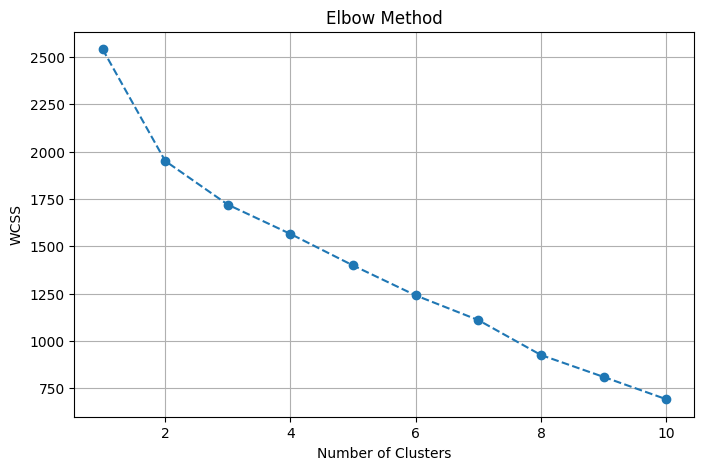

In [28]:
# It's a good practice to standardize the data before clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-Cluster-Sum-of-Squares
max_clusters = 10  # You can change this to a different maximum number of clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

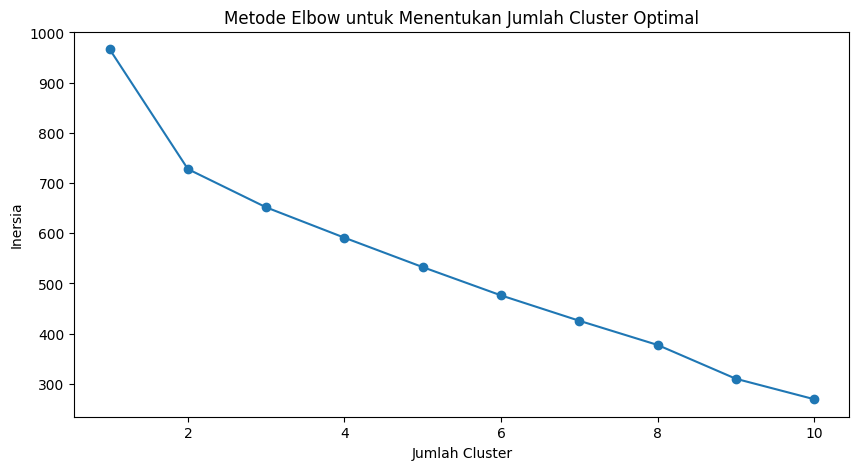

In [29]:
# Menghitung inersia untuk jumlah cluster 1 hingga 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Menampilkan plot untuk mencari elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [31]:
k_means_labels = model.fit_predict(data)
k_means_labels

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
df_trans['Cluster'] = k_means_labels
df_trans.head(22)

,Pertanyaan,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R115,R116,R117,R118,R119,R120,R121,R122,R123,Cluster
0,Kemudahan Aksesbilitas Kampus PENS [Seberapa s...,3,3,3,3,4,1,3,4,2,...,3,3,3,4,4,3,3,3,3,0
1,Kemudahan Aksesbilitas Kampus PENS [Seberapa m...,3,3,3,3,4,3,3,4,1,...,3,3,3,4,3,3,3,3,3,0
2,Kemudahan Aksesbilitas Kampus PENS [Seberapa m...,2,3,2,3,2,2,2,3,2,...,2,2,2,3,3,2,3,2,2,1
3,Kemudahan Aksesbilitas Kampus PENS [Sejauh man...,2,3,3,3,2,1,3,2,1,...,4,2,1,3,3,3,3,2,2,1
4,Kemudahan Aksesbilitas Kampus PENS [Bagaimana ...,2,4,4,4,2,3,2,3,2,...,2,1,2,2,1,3,1,2,1,1
5,Fasilitas Sarana dan Prasana Kampus PENS [Labo...,3,4,4,4,4,3,3,4,3,...,4,3,3,4,4,4,3,3,2,0
6,Fasilitas Sarana dan Prasana Kampus PENS [Perp...,2,4,4,4,4,3,3,4,3,...,3,3,3,4,4,4,4,3,3,0
7,Fasilitas Sarana dan Prasana Kampus PENS [Masjid],2,4,3,4,3,2,3,3,3,...,4,3,4,4,2,4,2,3,3,0
8,Fasilitas Sarana dan Prasana Kampus PENS [Kantin],2,4,2,4,4,1,3,4,1,...,3,2,2,3,3,4,3,3,4,1
9,Fasilitas Sarana dan Prasana Kampus PENS [Kama...,3,4,2,2,2,3,3,2,2,...,2,2,3,3,3,4,3,3,1,1


In [33]:
centroids  = model.cluster_centers_  
print(centroids)

#Mencari Silhouette Score
from sklearn.metrics import silhouette_score

cluster_labels = kmeans.fit_predict(data)
print(f'\nSilhouette Score(n=3): {silhouette_score(data, cluster_labels)}')

[[2.8125 3.1875 2.8125 3.3125 3.5    2.625  3.     3.4375 2.75   3.5
  3.     3.3125 2.875  3.5    3.0625 3.5    3.125  2.9375 2.9375 3.125
  2.8125 2.75   3.375  3.5    3.     3.4375 3.4375 2.4375 3.125  3.8125
  3.625  3.     3.3125 3.25   2.4375 2.6875 3.1875 2.9375 3.4375 3.875
  3.5625 2.9375 3.8125 2.875  3.5    3.4375 2.875  3.75   3.1875 3.
  3.8125 3.5    3.25   3.125  3.5    3.6875 3.125  2.875  3.25   2.875
  3.3125 3.1875 3.125  3.     3.625  3.125  2.9375 3.4375 3.125  3.5625
  3.875  2.6875 3.125  3.4375 3.3125 2.875  2.875  2.9375 2.8125 3.5
  2.875  2.75   3.1875 3.4375 2.8125 3.375  3.5625 3.25   3.     3.375
  2.875  3.1875 3.3125 2.875  2.9375 3.0625 3.4375 3.3125 3.     3.4375
  3.125  3.125  3.     3.3125 3.5    3.0625 3.0625 2.75   2.9375 2.875
  3.5625 2.9375 3.625  3.6875 3.4375 2.9375 3.125  3.4375 3.0625 3.375
  3.     3.0625 2.875 ]
 [2.2    3.6    2.6    3.2    2.4    2.     2.6    2.8    1.6    2.2
  3.     2.8    2.4    3.     2.6    3.4    2.6    2.2    2

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
def f(row):
    if row['Cluster'] == 0:
        val = 0
    elif row['Cluster'] == 1:
        val = 1
    return val

df_trans['Klaster KMeans'] = df_trans.apply(f, axis=1)

In [36]:
df_cluster = df_trans.drop(columns =(['Cluster']))
df_cluster

,Pertanyaan,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R115,R116,R117,R118,R119,R120,R121,R122,R123,Klaster KMeans
0,Kemudahan Aksesbilitas Kampus PENS [Seberapa s...,3,3,3,3,4,1,3,4,2,...,3,3,3,4,4,3,3,3,3,0
1,Kemudahan Aksesbilitas Kampus PENS [Seberapa m...,3,3,3,3,4,3,3,4,1,...,3,3,3,4,3,3,3,3,3,0
2,Kemudahan Aksesbilitas Kampus PENS [Seberapa m...,2,3,2,3,2,2,2,3,2,...,2,2,2,3,3,2,3,2,2,1
3,Kemudahan Aksesbilitas Kampus PENS [Sejauh man...,2,3,3,3,2,1,3,2,1,...,4,2,1,3,3,3,3,2,2,1
4,Kemudahan Aksesbilitas Kampus PENS [Bagaimana ...,2,4,4,4,2,3,2,3,2,...,2,1,2,2,1,3,1,2,1,1
5,Fasilitas Sarana dan Prasana Kampus PENS [Labo...,3,4,4,4,4,3,3,4,3,...,4,3,3,4,4,4,3,3,2,0
6,Fasilitas Sarana dan Prasana Kampus PENS [Perp...,2,4,4,4,4,3,3,4,3,...,3,3,3,4,4,4,4,3,3,0
7,Fasilitas Sarana dan Prasana Kampus PENS [Masjid],2,4,3,4,3,2,3,3,3,...,4,3,4,4,2,4,2,3,3,0
8,Fasilitas Sarana dan Prasana Kampus PENS [Kantin],2,4,2,4,4,1,3,4,1,...,3,2,2,3,3,4,3,3,4,1
9,Fasilitas Sarana dan Prasana Kampus PENS [Kama...,3,4,2,2,2,3,3,2,2,...,2,2,3,3,3,4,3,3,1,1


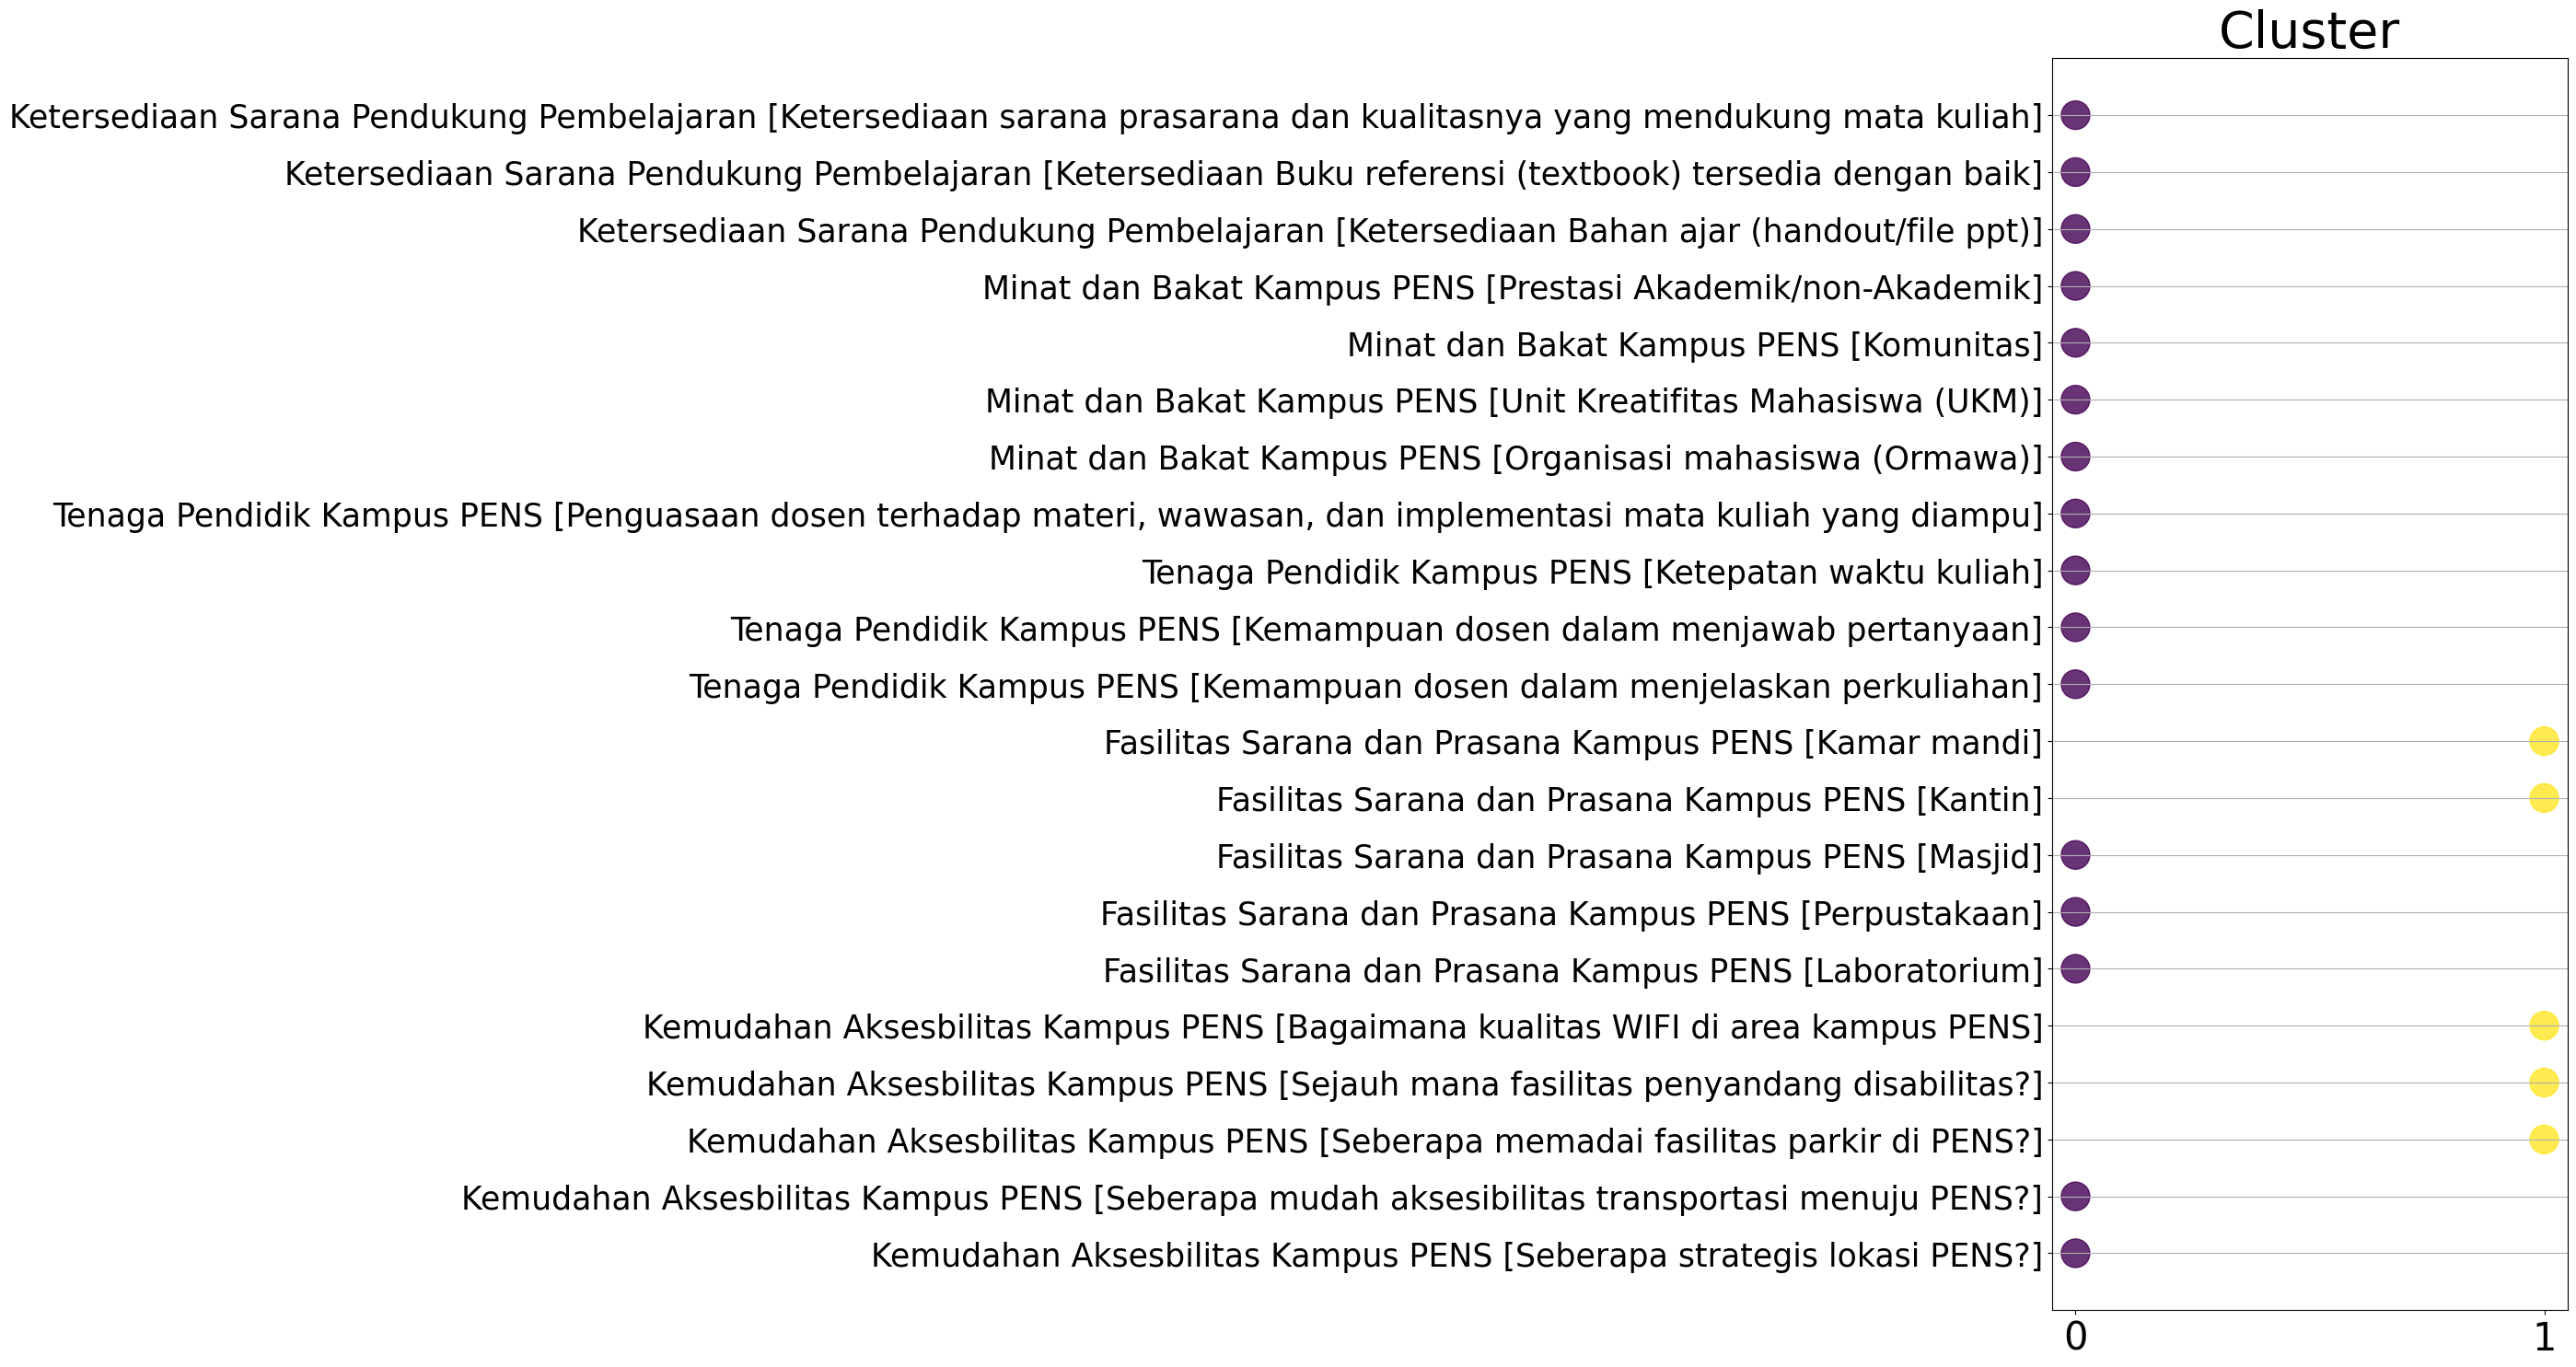

In [34]:
# Mengatur ukuran plot
plt.figure(figsize=(7, 17))

# Menampilkan scatter plot dengan titik-titik yang lebih besar dan warna berbeda
plt.scatter(df_trans['Cluster'], df_trans['Pertanyaan'], c=df_trans['Cluster'], cmap='viridis', s=500, alpha=0.8)

# Menambahkan judul plot (opsional) dengan ukuran teks yang lebih besar
plt.title('Cluster', fontsize=40)

# Mengatur jarak antara subplot dan pinggiran gambar
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Mengatur ukuran teks pada sumbu y (pertanyaan)
plt.tick_params(axis='y', labelsize=25)

# Memodifikasi angka pada sumbu x (Cluster)
plt.xticks([0, 1], ['0', '1'], fontsize=30)

# Menambahkan grid hanya pada sumbu horizontal (which='major')
plt.grid(True, which='major', axis='y')

# Menampilkan plot
plt.show()

In [37]:
#Pilih DBSCAN untuk clustering dan simpan dataset ke xlsx
df_cluster.to_csv('Cluster MHS.csv', index = False)